# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


In [2]:
sample = (x_10, x_50, x_100, x_1000)

In [3]:
sample[1]

array([-0.98662138,  2.28566405, -0.23982793,  4.15198907, -0.10112734,
       -0.4035975 , -1.58300983,  4.98718204,  0.50382647,  1.61680449,
       -2.07119837,  4.9377822 , -2.75418625,  4.81752506, -5.41695141,
        5.34199373, -4.81233882,  2.41543355, -0.59873959, -3.44427243,
       -1.29628281,  3.29571515, -2.537956  , -2.60491583,  1.68251076,
       -2.33852489, -2.02084266,  3.82567976,  2.72906191,  1.58585206,
        5.05934646, -1.7300536 , -1.29244638, -1.12868756, -1.03227741,
        3.17000214,  4.45391594, -2.04995376,  1.74341807,  2.79182059,
       -2.08038456, -0.99062   , -3.37772668, -0.91630238, -2.91673473,
       -1.87158667,  3.46091089, -1.61622682, -0.11787202, -0.33902359])

x_10


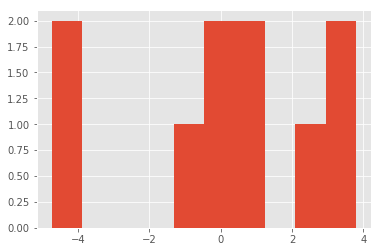

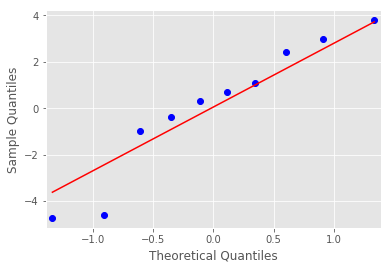

x_50


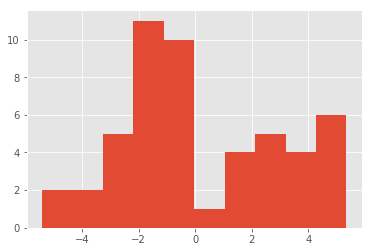

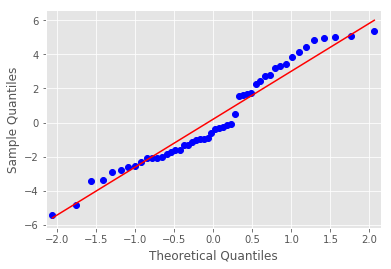

x_100


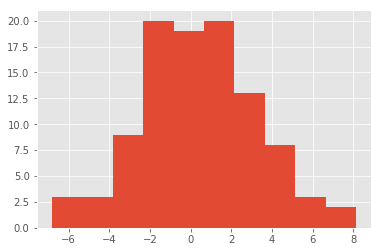

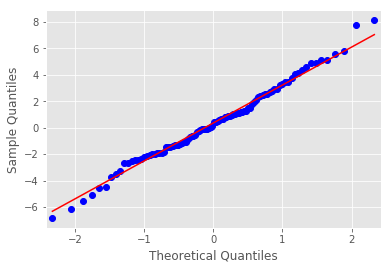

x_1000


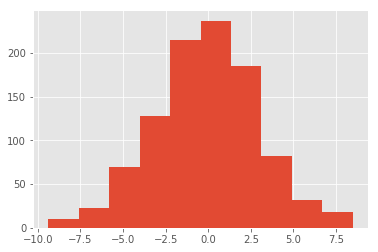

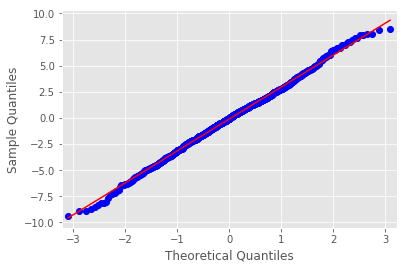

In [4]:
for x in sample:
    print("x_{}".format(len(x)))
    plt.hist(x)
    sm.qqplot(x, line='s')
    plt.show()

### Answers
As we increase the sample size the distribution becomes more normal. With less values, their is a larger probability for noise.


### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

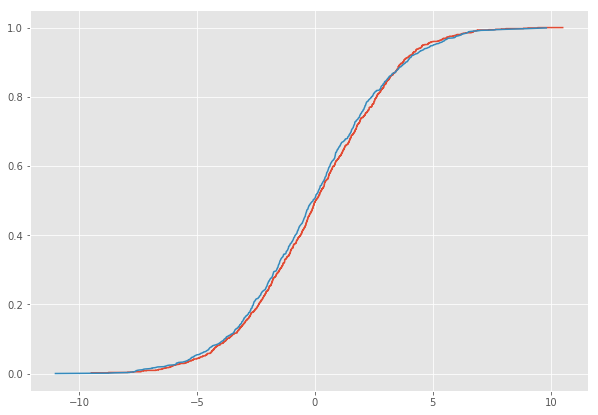

In [6]:
## testing function found on stackflow
test = stats.norm.rvs(0, 3, 1000)
ecdf = sm.distributions.ECDF(test)

x = np.sort(test)
y = ecdf(x)

plt.figure(figsize=(10, 7))
plt.step(x,y)
plt.plot(np.sort(stats.norm.rvs(0,3, len(test))), np.linspace(0,1, len(test),endpoint=False))
plt.show()

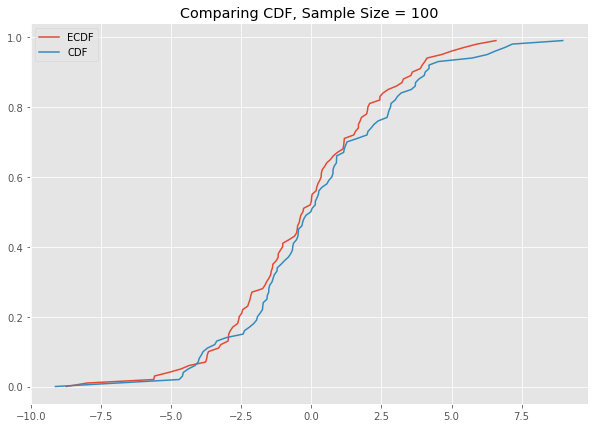

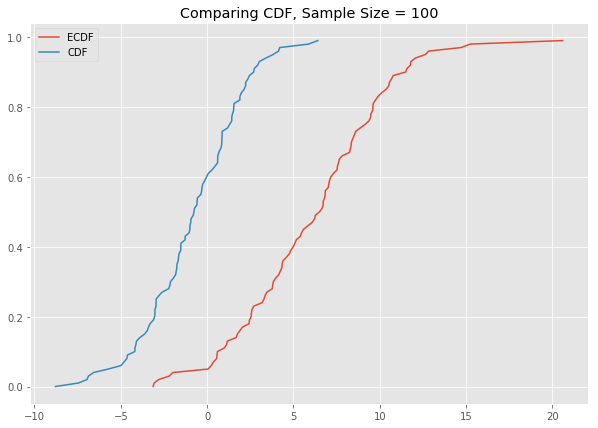

In [7]:
def ks_plot(data, mu, std):
    
    plt.figure(figsize=(10, 7))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=mu, scale=std, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDF, Sample Size = {}'.format(len(data)))
    
mu = 0
std = 3
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100), mu, std) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100), mu, std)

This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

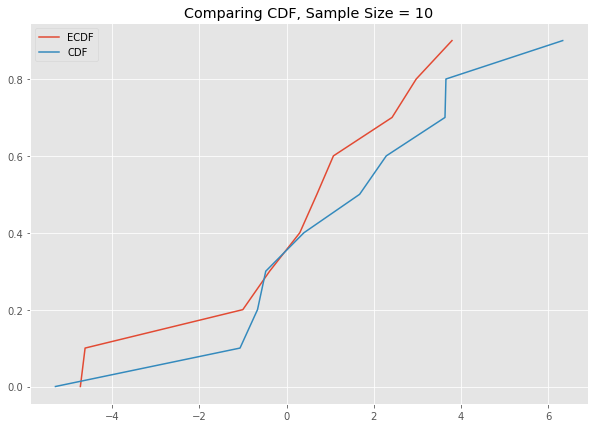

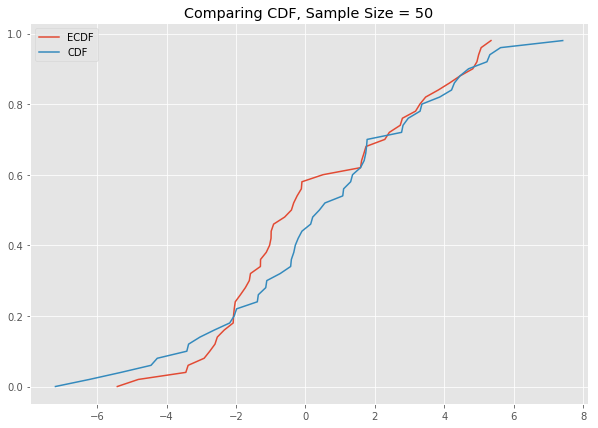

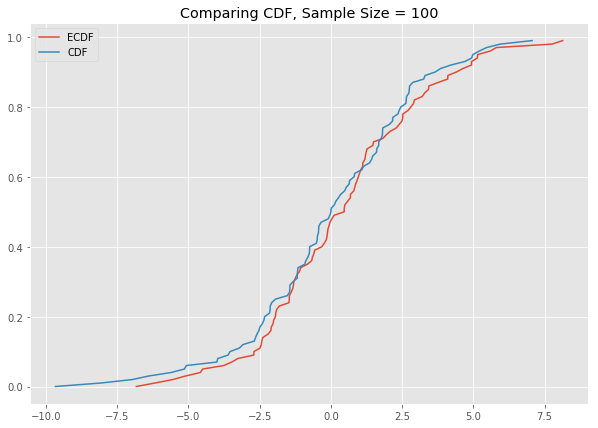

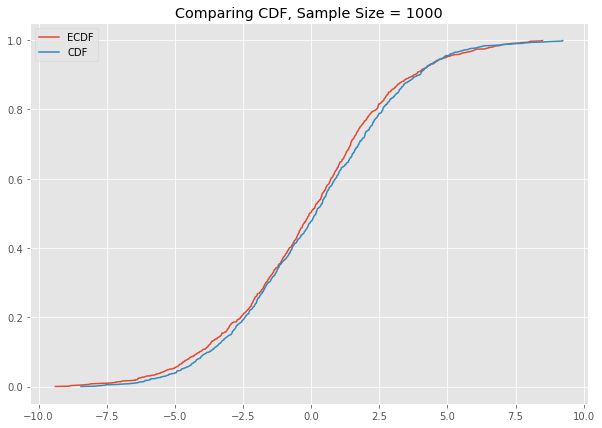

In [8]:
# Your code here
for i in sample:
    ks_plot(i, mu, std)

### Your comments here 
As we increase the sample size the distribution becomes more normal. With less values, their is a larger probability for noise. This in turn will reduce the value of d

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [26]:
# Perform K-S test 

# Your code here

def k_s_test_scipy(data, mu, std):
    
    d, p = stats.kstest(data, 'norm', args=(mu, std))
    print("Test Statistic = {}, pvalue = {}".format(d,p))
    if p < 0.05:
        print('The sample tested is not identical to the normal distribution')
    else:
        print('The tested sample is normal')

for i in sample:
    k_s_test_scipy(i, mu, std)
# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

Test Statistic = 0.16909549224094222, pvalue = 0.9373200452054963
The tested sample is normal
Test Statistic = 0.11344544373288484, pvalue = 0.5129681864843461
The tested sample is normal
Test Statistic = 0.09356056930085596, pvalue = 0.3264259514781913
The tested sample is normal
Test Statistic = 0.026177344985504947, pvalue = 0.49921577341200774
The tested sample is normal


In [27]:
# Your comments here 
# The p-value is consitantly greater then 0.05 therefore we cannot reject the null hypothesis
# The null hypothesis here would be that there is no difference between the sample tested and a normal distribution
# Given the results we have sufficient evidence to the contrary and can therefore assume normality

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [32]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution

print(stats.kstest(x_uni, 'uniform'))
k_s_test_scipy(x_uni, mu, std)

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.025785453320469554, pvalue=0.5192898586425022)
Test Statistic = 0.5000299478995087, pvalue = 0.0
The sample tested is not identical to the normal distribution


In [ ]:
# Your comments here
# In the first instance, given that p > 0.05, we cannot reject the null hypothesis
# We Can therefore assert that the distribution is uniform
# However comparing the uniform distribution to the normal, we see that the p value is < 0.05
# We can therefore reject the null hypothesis and saw assume that the two distributions are not identical

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

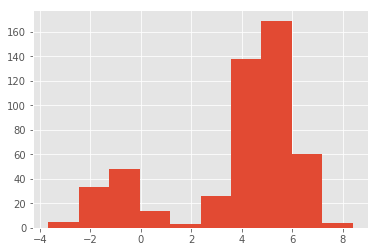

In [37]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

1000 500


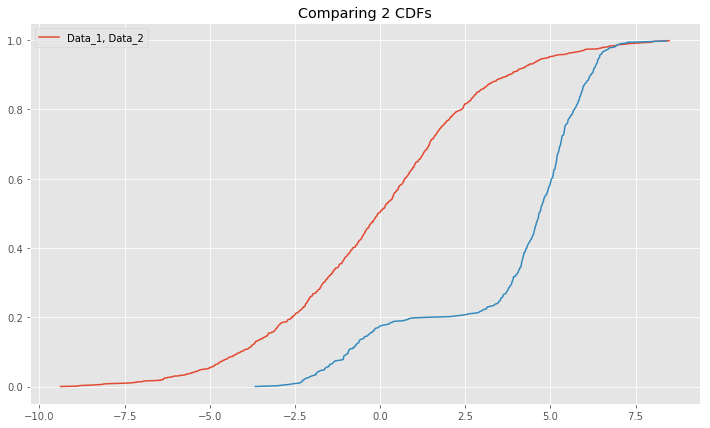

In [40]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
#     if len(data_1) != len(data_2):
#         print("Datasets must have the same size")
#     else:
    plt.figure(figsize=(12,7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend(['Data_1, Data_2'])
    plt.title('Comparing 2 CDFs')
    print(len(data_1),len(data_2))
        

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [42]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.648, pvalue=1.102040544831308e-123)

In [ ]:
# Your comments here 
# We can reject the null hypothesis and assume that these distributionsare not the same

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 